In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torchvision
import torch
import captum.optim as optimviz
from inceptionv1 import model as inceptionv1

In [3]:
# Normal image optimization with captum appears to work
target = inceptionv1.inception5b
channel = 1

image = optimviz.images.NaturalImage((224, 224)).to("cuda")
loss_fn = optimviz.loss.ChannelActivation(target, channel)
transforms = torch.nn.Sequential(
    torch.nn.ReflectionPad2d(4),
    optimviz.transforms.RandomSpatialJitter(8),
    optimviz.transforms.RandomScale(scale=(1, 0.975, 1.025, 0.95, 1.05)),
    torchvision.transforms.RandomRotation(degrees=(-5, 5)),
    optimviz.transforms.RandomSpatialJitter(2),
    optimviz.transforms.CenterCrop((60, 60))
)
obj = optimviz.InputOptimization(
    clip.visual, input_param=image, loss_function=loss_fn)
history = obj.optimize(optimviz.optimization.n_steps(256, True))

NameError: name 'clip' is not defined

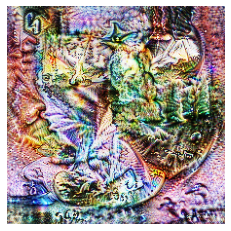

In [29]:
image().show()

In [8]:
from prior_optimization import create_optimized_image, display_optimized_image
import matplotlib.pyplot as plt

biggan_input, loss_history = create_optimized_image(target=target, channel=channel, n_steps=32, lr=0.001)
display_optimized_image(biggan_input)
plt.plot(loss_history.cpu().detach().numpy())

TypeError: __init__() got an unexpected keyword argument 'lr'